In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  
import warnings

warnings.filterwarnings('ignore', category=UserWarning)  # Ignores all UserWarnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignores all FutureWarnings

In [2]:
manga_df = pd.read_csv('./raw_manga_proccessed_updated.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)  
manga_df.head(5)

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Types,Volumes,Chapters,Status,Genres,Demographic,Serialization,Author,Released date,Completed date,Total Review,Recommended,Mixed Feelings,Not Recommended
0,Berserk,9.47,363720,1,1,725079,130489,Manga,3,16,Publishing,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"", ""'Drama'"", ""'Fantasy'"", ""'Horror'"", ""'Supernatural'"", ""'Gore'"", ""'Military'"", ""'Mythology'"", ""'Psychological'""]",Seinen,Young Animal,"[""'Miura,Kentarou'"", ""'Studio Gaga'""]",1989-08-25,Updating,289,252,17,20
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run (JoJo's Bizarre Adventure Part 7: Steel Ball Run),9.31,172219,2,23,280428,46269,Manga,24,96,Finished,"[""'Action'"", ""'Adventure'"", ""'Mystery'"", ""'Supernatural'"", ""'Historical'""]",Seinen,Ultra Jump,"[""'Araki,Hirohiko'""]",2004-01-19,2011-04-19,131,123,7,1
2,Vagabond,9.26,154583,3,13,406082,44258,Manga,37,327,On Hiatus,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"", ""'Historical'"", ""'Samurai'""]",Seinen,Morning,"[""'Inoue,Takehiko'"", ""'Yoshikawa,Eiji'""]",1998-09-03,2015-05-21,104,93,9,2
3,One Piece,9.22,392811,4,4,642620,119974,Manga,3,16,Publishing,"[""'Action'"", ""'Adventure'"", ""'Fantasy'""]",Shounen,Shounen Jump (Weekly),"[""'Oda,Eiichiro'""]",1997-07-22,Updating,231,190,21,20
4,Monster,9.16,104327,5,29,258581,22008,Manga,18,162,Finished,"[""'Award Winning'"", ""'Drama'"", ""'Mystery'"", ""'Adult Cast'"", ""'Psychological'""]",Seinen,Big Comic Original,"[""'Urasawa,Naoki'""]",1994-12-05,2001-12-20,86,69,11,6


In [3]:
data = {
    'Tên cột': ['Title', 'Score', 'Vote', 'Ranked', 'Popularity', 'Members', 'Favorite', 'Type', 'Volumes', 'Chapters', 'Status', 'Realeased date', 'Completed date', 'Genres', 'Themes', 'Demographics', 'Serialization', 'Author', 'Total Review', 'Recommended', 'Mixed Feelings', 'Not Recommended'],
    'Description': [
        'Tên của bộ manga',
        'Điểm số trung bình của bộ manga',
        'Số lượt bình chọn cho bộ manga',
        'Xếp hạng của bộ manga',
        'Độ phổ biến của bộ manga',
        'Số thành viên theo dõi bộ manga',
        'Số lượt đánh dấu yêu thích bộ manga',
        'Thể loại của bộ manga (ví dụ: Manga, Novel)',
        'Số lượng tập đã phát hành',
        'Số lượng chương đã phát hành',
        'Tình trạng phát hành của bộ manga (ví dụ: Đang tiến hành, Đã hoàn thành)',
        'Ngày bắt đầu phát hành bộ manga',
        'Ngày hoàn thành phát hành bộ manga',
        'Thể loại của bộ manga',
        'Chủ đề của bộ manga',
        'Nhóm đối tượng hướng đến của bộ manga',
        'Nơi đăng tải bộ manga',
        'Tác giả của bộ manga',
        'Tổng số bài đánh giá',
        'Số lượng lượt đề xuất',
        'Số lượng lượt cảm xúc lẫn lộn',
        'Số lượng lượt không đề xuất'
    ],
    'Evaluation criteria': [
        'Tên bộ manga',
        'Điểm số trung bình, càng cao càng tốt',
        'Số lượt bình chọn, càng cao càng tốt',
        'Xếp hạng, càng thấp càng tốt',
        'Độ phổ biến, càng cao càng tốt',
        'Số thành viên, càng cao càng tốt',
        'Số lượt yêu thích, càng cao càng tốt',
        'Thể loại',
        'Số lượng tập, càng cao càng tốt',
        'Số lượng chương, càng cao càng tốt',
        'Tình trạng phát hành',
        'Ngày bắt đầu phát hành',
        'Ngày hoàn thành phát hành',
        'Danh sách các thể loại',
        'Danh sách các chủ đề',
        'Đối tượng hướng đến',
        'Nơi đăng tải',
        'Tác giả',
        'Tổng số bài đánh giá, càng cao càng tốt',
        'Số lượng đề xuất, càng cao càng tốt',
        'Số lượng cảm xúc lẫn lộn',
        'Số lượng không đề xuất, càng thấp càng tốt'
    ]
}

column_description_df = pd.DataFrame(data)
column_description_df

,Tên cột,Description,Evaluation criteria
0,Title,Tên của bộ manga,Tên bộ manga
1,Score,Điểm số trung bình của bộ manga,"Điểm số trung bình, càng cao càng tốt"
2,Vote,Số lượt bình chọn cho bộ manga,"Số lượt bình chọn, càng cao càng tốt"
3,Ranked,Xếp hạng của bộ manga,"Xếp hạng, càng thấp càng tốt"
4,Popularity,Độ phổ biến của bộ manga,"Độ phổ biến, càng cao càng tốt"
5,Members,Số thành viên theo dõi bộ manga,"Số thành viên, càng cao càng tốt"
6,Favorite,Số lượt đánh dấu yêu thích bộ manga,"Số lượt yêu thích, càng cao càng tốt"
7,Type,"Thể loại của bộ manga (ví dụ: Manga, Novel)",Thể loại
8,Volumes,Số lượng tập đã phát hành,"Số lượng tập, càng cao càng tốt"
9,Chapters,Số lượng chương đã phát hành,"Số lượng chương, càng cao càng tốt"


In [4]:
manga_df.dtypes

Title               object
Score              float64
Vote                 int64
Ranked               int64
Popularity           int64
Members              int64
Favorite             int64
Types               object
Volumes              int64
Chapters             int64
Status              object
Genres              object
Demographic         object
Serialization       object
Author              object
Released date       object
Completed date      object
Total Review         int64
Recommended          int64
Mixed Feelings       int64
Not Recommended      int64
dtype: object

#### Mối quan hệ giữa số lượng chương (Chapters) và tập (Volumns) với số lượng người theo dõi bộ truyện (Members) và mức độ tương tác của họ (Favourite)?

#### Mục tiêu: Phân tích mối quan hệ giữa **số lượng chương**, **số lượng tập**, **số lượng người đọc**, và **số lượng yêu thích** sẽ giúp ta hiểu rõ hơn về cách các yếu tố này ảnh hưởng đến sự phổ biến và mức độ gắn kết của manga đối với độc giả. Những phân tích này rất hữu ích cho các nhà xuất bản manga, các tác giả, và những ai quan tâm đến việc phát triển nội dung manga một cách hiệu quả và thu hút người đọc lâu dài. và thu hút người đọc lâu dài.
#### Ý tưởng:
- Tính toán và vẽ ma trận tương quan giữa Chapter, Volume, Members và Favorites.  
- Vẽ biểu đồ scatter giữa Chapter, Volume, Members và Favorites.  
- Thêm đường xu hướng để xác định bất kỳ xu hướng hoặc mối tương quan nào.o.

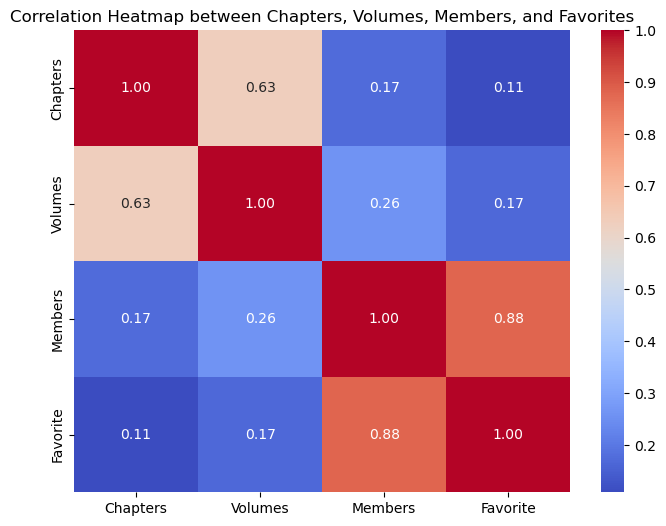

In [5]:
# Chọn ra các cột cần thiết từ dataframe
heatmap_data = manga_df[['Chapters', 'Volumes', 'Members', 'Favorite']]

# Tính toán ma trận tương quan giữa các thuộc tính
correlation_matrix = heatmap_data.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between Chapters, Volumes, Members, and Favorites')
plt.show()

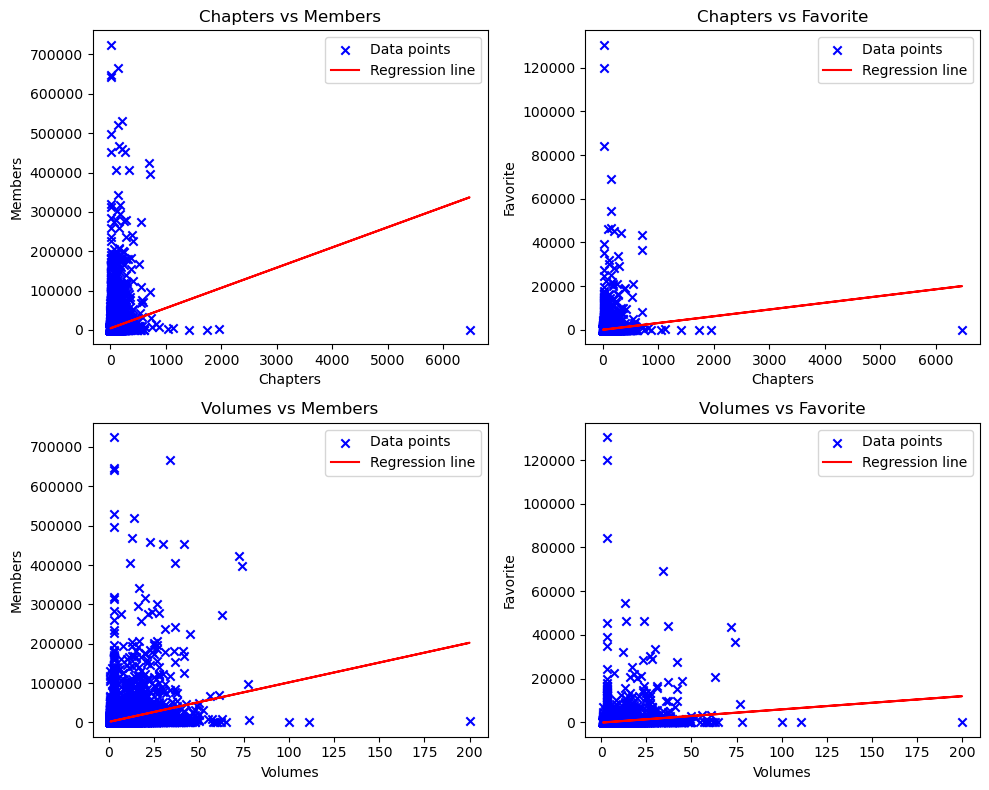

In [6]:
# Hàm để vẽ đường hồi quy cho mỗi cặp thuộc tính
def plot_regression_line(x, y, ax):
    # Xử lý dữ liệu để có thể thực hiện hồi quy
    x_reshape = x.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_reshape, y)
    y_pred = model.predict(x_reshape)
    
    # Vẽ biểu đồ phân tán và đường hồi quy
    ax.scatter(x, y, c ='blue' ,marker='x', label='Data points')
    ax.plot(x, y_pred, color='red', label='Regression line')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend()

# Vẽ biểu đồ phân tán với đường hồi quy cho các cặp thuộc tính
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Cặp 1: Chapters vs Members
plot_regression_line(manga_df['Chapters'], manga_df['Members'], axs[0, 0])
axs[0, 0].set_title('Chapters vs Members')

# Cặp 2: Chapters vs Favorite
plot_regression_line(manga_df['Chapters'], manga_df['Favorite'], axs[0, 1])
axs[0, 1].set_title('Chapters vs Favorite')

# Cặp 3: Volumes vs Members
plot_regression_line(manga_df['Volumes'], manga_df['Members'], axs[1, 0])
axs[1, 0].set_title('Volumes vs Members')

# Cặp 4: Volumes vs Favorite
plot_regression_line(manga_df['Volumes'], manga_df['Favorite'], axs[1, 1])
axs[1, 1].set_title('Volumes vs Favorite')

plt.tight_layout()
plt.show()


### Ma trận tương quan:
- **Tương quan giữa Members và Favorites**: Một tương quan mạnh mẽ với hệ số 0.88 cho thấy rằng khi manga có nhiều thành viên hơn, nó thường nhận được nhiều lượt yêu thích hơn, chỉ ra mối liên hệ chặt chẽ giữa quy mô khán giả và mức độ tương tác.  
- **Tương quan giữa Chapters và Volumes**: Tương quan rất mạnh với hệ số 0.63, cho thấy rằng manga có nhiều chương thường có nhiều tập hơn, điều này là hiển nhiên vì các chương thường được tập hợp thành các tập.  
- **Tương quan giữa Chapters/Volumes và Members/Favorites**:  
  - Tương quan dương nhưng yếu, cho thấy có xu hướng tăng nhẹ nhưng không đủ mạnh để dự đoán chính xác.  
  - Điều này có nghĩa là một manga dài hơn không đảm bảo sẽ có nhiều thành viên hoặc lượt yêu thích hơn.  

### Phân tích đường xu hướng:
- Có xu hướng tăng giữa **chapters và members**, cũng như **volumes và members**, cho thấy rằng nội dung nhiều hơn thường dẫn đến lượng khán giả lớn hơn.  
- Xu hướng yếu hơn giữa **chapters và favorites**, cũng như **volumes và favorites**, cho thấy độ dài nội dung có tác động hạn chế đến lượt yêu thích.  
- Sự phân tán trong tất cả các biểu đồ cho thấy sự biến động chưa được giải thích chỉ bằng độ dài nội dung.  
- Điều này chỉ ra rằng các yếu tố khác (như thể loại, danh tiếng tác giả, chất lượng cốt truyện) có ảnh hưởng đến mức độ tương tác và số lượng thành viên.  thành viên.  

### Số lượng manga được phát hành đã thay đổi như thế nào theo thời gian từ quá khứ đến hiện tại?
#### Mục tiêu:
- Hiểu về sự phát triển lịch sử của manga: Theo dõi sự phát triển của ngành công nghiệp manga từ giai đoạn đầu cho đến hiện tại.  - 
Xác định xu hướng phát hành manga: Quan sát cách số lượng manga được phát hành thay đổi theo thời gian và nhận diện bất kỳ sự thay đổi hoặc mô hình đáng chú ý nào.  
#### Ý tưởng:
- Tạo một cột mới tên là **Year** để trích xuất năm từ cột **Released date**.  - 
Tạo một cột mới tên là **Decade** bằng cách chia cột **Year** cho 10 và làm tròn xuống số nguyên gần nhất.  - 
Nhóm dữ liệu theo **Year** và **Decade**, sau đó tính số lượng manga phát hành trong mỗi năm và mỗi thập kỷ. -  
Trực quan hóa dữ liệu bằng biểu đồ cột để quan sát xu hướng phát hành manga theo thời gian.

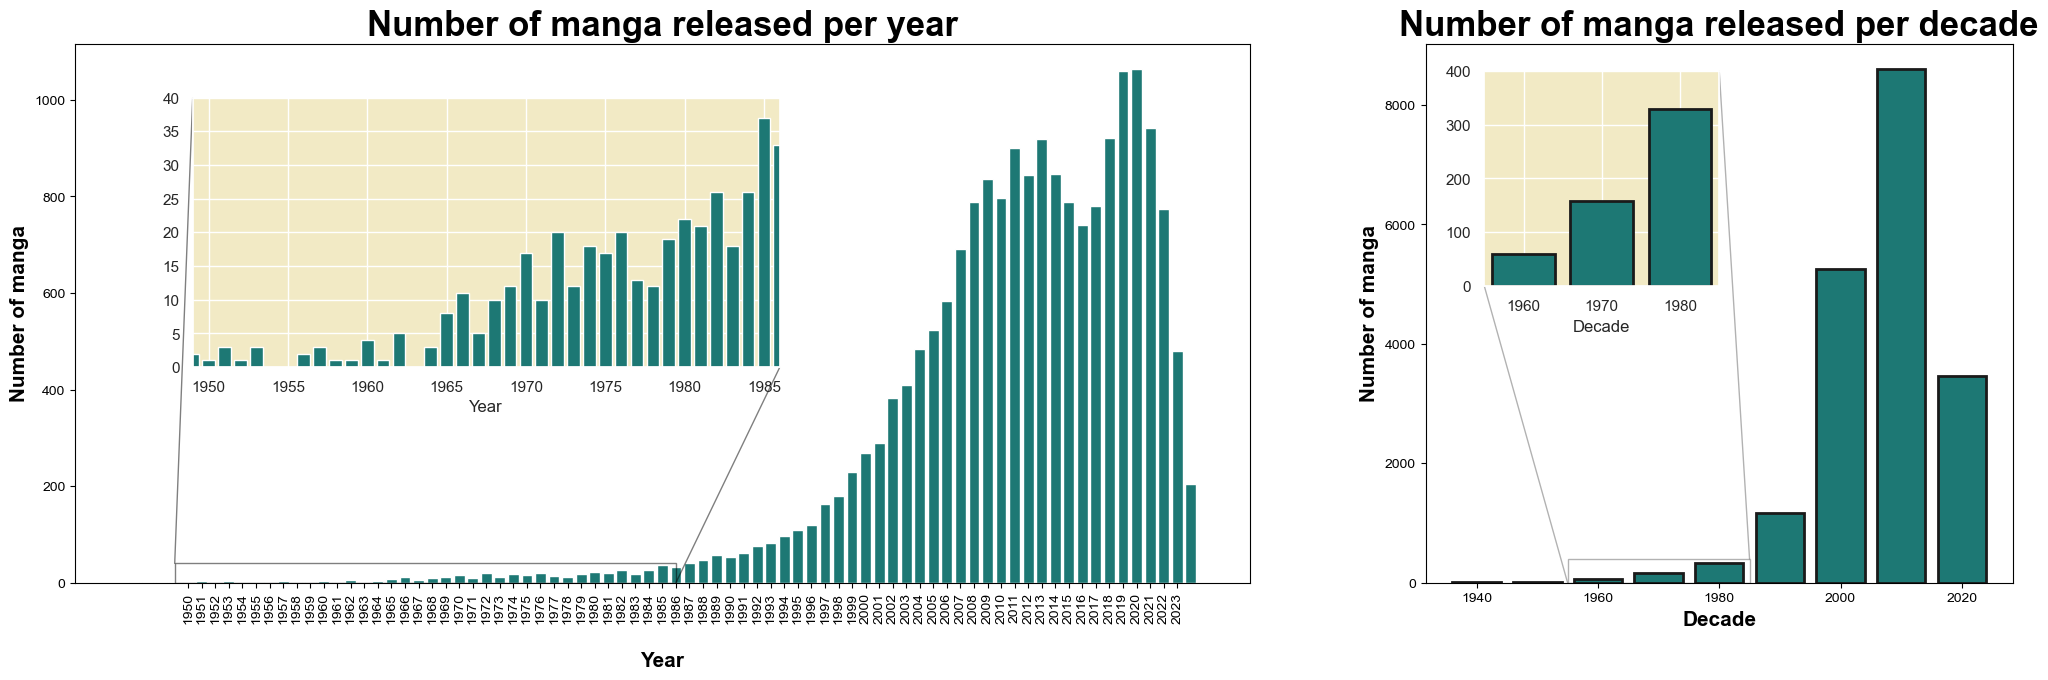

In [7]:
df_copy = manga_df.copy()
df_copy['Released date'] = pd.to_datetime(df_copy['Released date'], errors='coerce')
# group by year and count the number of manga released in each year
df_copy['Year'] = df_copy['Released date'].dt.year.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10

manga_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
manga_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')
# Plotting the number of manga released per year and the number of manga released per decade
fig, axes = plt.subplots(1, 2, figsize=(25, 7), gridspec_kw={'width_ratios': [2, 1]})
# sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
axes[0].bar(manga_per_year['Year'], manga_per_year['Count'], color="#1d7874")
axes[0].set_title('Number of manga released per year', fontsize=25, weight='bold')
axes[0].set_xlabel('\nYear', fontsize=15, weight='bold')
axes[0].set_ylabel('Number of manga', fontsize=15, weight='bold')
axes[0].set_xticks(range(1950, 2024, 1))
axes[0].set_xticklabels(range(1950, 2024, 1), rotation=90)

axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(manga_per_year['Year'], manga_per_year['Count'], color="#1d7874", width=0.8)
axin.set_xlim(1949, 1986)
axin.set_ylim(0, 40)
axin.set_xticks(range(1950, 1986, 5))
axin.set_xlabel('Year')
axin.set_ylabel('')

axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(manga_per_decade['Decade'], manga_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axes[1].set_title('Number of manga released per decade', fontsize=25, weight='bold')
axes[1].set_xlabel('Decade', fontsize=15, weight='bold')
axes[1].set_ylabel('Number of manga', fontsize=15, weight='bold')

axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(manga_per_decade['Decade'], manga_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axin.set_xlim(1955, 1985)
axin.set_ylim(0, 400)
axin.set_xlabel('Decade')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()

Hai biểu đồ không chỉ giúp chúng ta phân tích số lượng manga phát hành mà còn cung cấp cái nhìn sâu sắc về sự phát triển của ngành công nghiệp manga Nhật Bản:

### Tổng quan:
Dễ dàng nhận thấy rằng số lượng manga phát hành đã tăng dần qua các năm, nhưng có sự giảm sút đáng kể trong những năm gần đây (từ năm 2020 trở đi). Số lượng manga phát hành, cũng như quá trình phát triển của ngành công nghiệp manga Nhật Bản, có thể được chia thành nhiều giai đoạn:

#### 1950-1970: Giai đoạn đầu
Mặc dù trước giai đoạn này đã có các tác phẩm manga tại Nhật Bản, nhưng dữ liệu chỉ cung cấp thông tin từ năm 1950. Giai đoạn này được coi là khởi đầu của ngành công nghiệp manga Nhật Bản, với số lượng manga phát hành tương đối hạn chế, chỉ vài tác phẩm mỗi năm, cao nhất là 6 tác phẩm vào năm 1969.

#### 1970-1985: Giai đoạn phát triển ban đầu
Trong giai đoạn này, số lượng manga phát hành tăng lên so với giai đoạn trước, cho thấy sự khởi đầu của sự phát triển ngành công nghiệp manga Nhật Bản. Số lượng manga phát hành tăng dần mỗi năm, khoảng 7-8 tác phẩm mỗi năm. Đây cũng là giai đoạn mà manga Nhật Bản bắt đầu lan rộng ra toàn cầu với các tác phẩm như *Dragon Ball*, *Tsubasa*, v.v.

#### 1985-2010: Giai đoạn phát triển mạnh mẽ
Giai đoạn này chứng kiến sự bùng nổ về số lượng manga phát hành so với giai đoạn trước (từ 10 tác phẩm mỗi năm lên hơn 200 tác phẩm mỗi năm). Đây cũng là thời kỳ ngành công nghiệp manga Nhật Bản mở rộng ra toàn cầu với những tác phẩm nổi tiếng như *Naruto*, *One Piece*, *Bleach*, v.v.

#### 2010 đến nay: Đỉnh cao và sự giảm sút gần đây
Trong giai đoạn này, ngành công nghiệp manga Nhật Bản đạt đỉnh cao về số lượng phát hành, độ phổ biến toàn cầu và mức độ bao phủ, với hơn 300 tác phẩm mỗi năm, đạt đỉnh điểm là 356 tác phẩm vào năm 2020. Tuy nhiên, từ năm 2020 trở đi, có thể do tác động nặng nề của đại dịch Covid-19, số lượng manga phát hành đã giảm sút đáng kể.

### Số lượng manga được phát hành thay đổi như thế nào giữa các mùa trong năm? Có xu hướng rõ ràng nào trong phân bố các lần phát hành manga theo mùa không?
#### Mục tiêu: 
- Khám phá các chu kỳ phát hành manga, làm sáng tỏ các mô hình trong việc phát hành manga.  - 
Cung cấp thông tin hữu ích cho các nhà xuất bản, người hâm mộ và các chuyên gia trong ngành để lập kế hoạch, chiến lược tiếp thị và ra quyết định một cách hiệu quả
#### Ý tưởng:
- Tạo một cột mới tên là **Season** để lưu trữ mùa trong năm mà manga được phát hành.  - 
Nhóm dữ liệu theo **Season** và tính tổng số lượng manga phát hành trong mỗi mùa
- 
Trực quan hóa dữ liệu bằng biểu đồ cột để quan sát xu hướng và các mô hình phát hành manga giữa các mùa.   

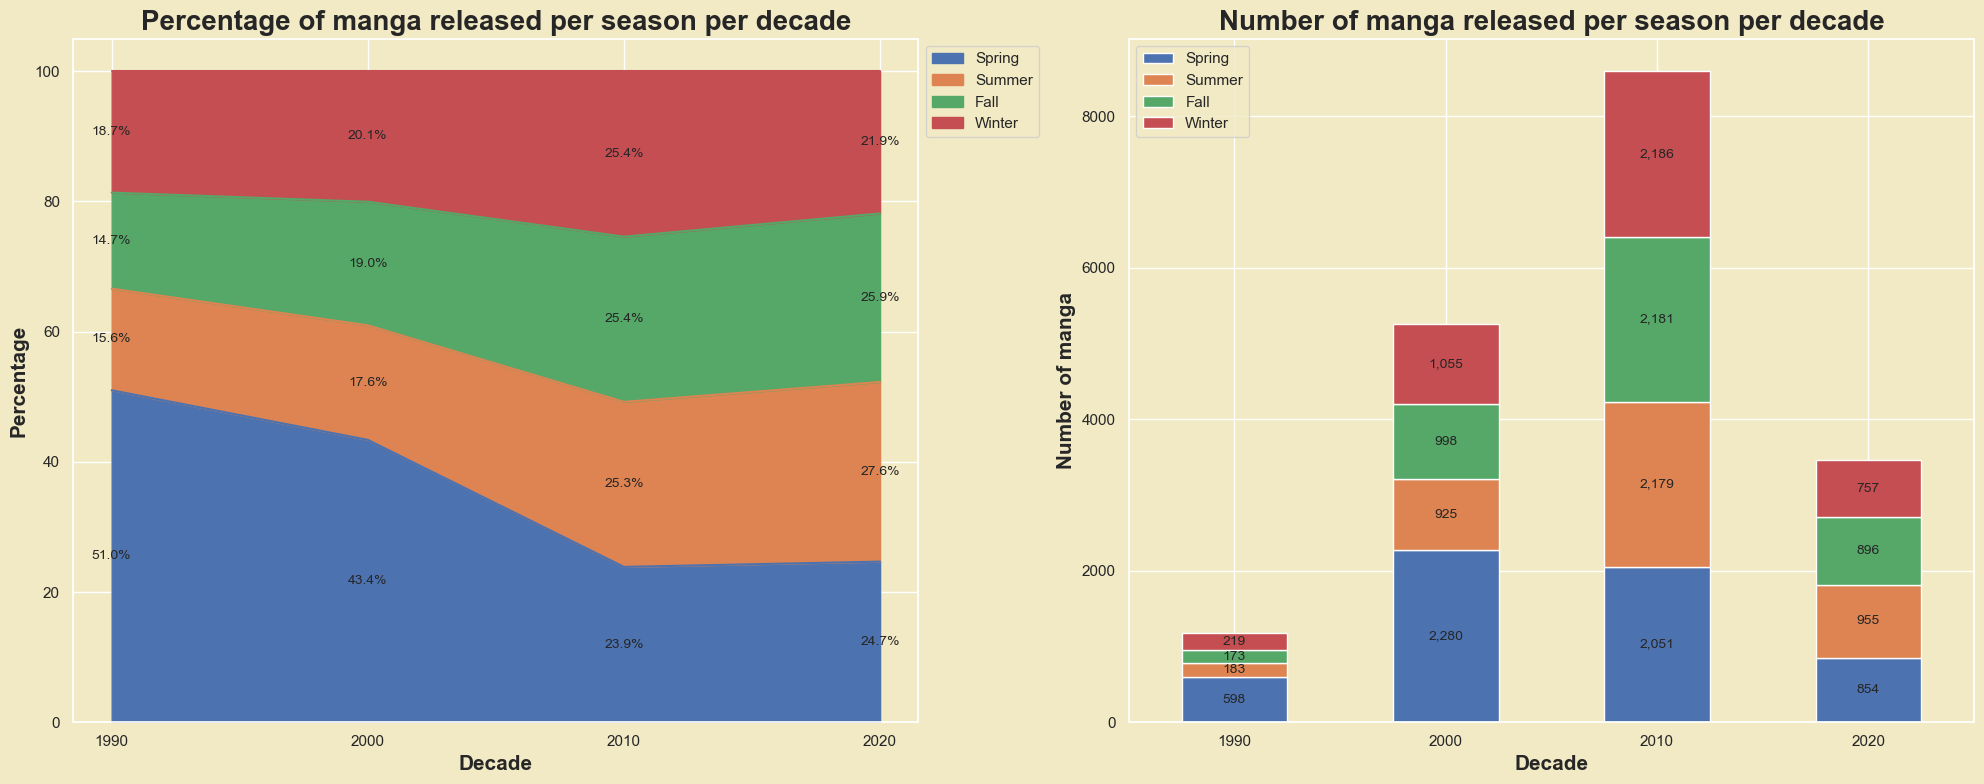

In [8]:
df_copy['Month'] = df_copy['Released date'].dt.month.astype('Int64')
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df_copy['Season'] = pd.cut(df_copy['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)
# Group by 'Decade' and 'Season' with observed=False
manga_per_season = (
    df_copy[df_copy['Year'] >= 1990]
    .groupby(['Decade', 'Season'], observed=False)
    .size()
    .reset_index(name='Count')
)

# Tính phần trăm
manga_per_season['Percentage'] = manga_per_season['Count'] / manga_per_season.groupby('Decade', observed=False)['Count'].transform('sum') * 100

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Vẽ biểu đồ area
area_plot_data = manga_per_season.groupby(['Decade', 'Season'], observed=False)['Percentage'].sum().unstack()
area_plot_data.plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of manga released per season per decade', fontsize=20, weight='bold')
ax[0].set_xlabel('Decade', fontsize=15, weight='bold')
ax[0].set_ylabel('Percentage', fontsize=15, weight='bold')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0))
ax[0].set_xticks(range(1990, 2030, 10))

# Thêm số liệu vào biểu đồ area
for decade, row in manga_per_season.groupby('Decade'):
    cumulative_percentage = 0
    for season, percentage in row.set_index('Season')['Percentage'].items():
        cumulative_percentage += percentage
        x_pos = decade
        y_pos = cumulative_percentage
        ax[0].text(x_pos, y_pos - percentage / 2, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

# Vẽ biểu đồ bar
bar_plot_data = manga_per_season.groupby(['Decade', 'Season'], observed=False)['Count'].sum().unstack()
bar_plot_data.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of manga released per season per decade', fontsize=20, weight='bold')
ax[1].set_xlabel('Decade', fontsize=15, weight='bold')
ax[1].set_ylabel('Number of manga', fontsize=15, weight='bold')
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(manga_per_season['Decade'].unique(), rotation=0)

# Thêm số liệu vào biểu đồ bar
for bar in ax[1].patches:
    height = bar.get_height()
    if height > 0:
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_y() + height / 2
        ax[1].text(x_pos, y_pos, f"{int(height):,}", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### Biểu đồ 1: **Percentage of Manga Released Per Season Per Decade**
- **Ý nghĩa**: Biểu đồ này thể hiện tỷ lệ phần trăm manga phát hành theo từng mùa (Spring, Summer, Fall, Winter) qua các thập kỷ từ 1990 đến 2020.
- **Nhận xét**:
  - **Xu hướng giảm tỷ lệ mùa Xuân (Spring)**: Từ năm 1990, tỷ lệ manga phát hành vào mùa Xuân giảm đáng kể từ **51%** xuống còn **24.7%** vào năm 2020.
  - **Tăng đều ở các mùa khác**:
    - **Mùa Hè (Summer)**: Tăng từ **15.6% (1990)** lên **27.6% (2020)**, cho thấy mùa này ngày càng được ưa chuộng để phát hành manga.
    - **Mùa Thu (Fall)** và **Mùa Đông (Winter)** cũng tăng đáng kể, đạt tỷ lệ **25.9% (Fall)** và **21.9% (Winter)** vào năm 2020.
  - **Phân bổ đồng đều hơn vào năm 2020**: Đến thập kỷ này, các mùa có tỷ lệ gần như cân bằng, với mức chênh lệch nhỏ giữa các mùa.


### Biểu đồ 2: **Number of Manga Released Per Season Per Decade**
- **Ý nghĩa**: Biểu đồ hiển thị số lượng manga phát hành thực tế theo mùa qua từng thập kỷ.
- **Nhận xét**:
  - **Tăng trưởng tổng thể từ năm 1990 đến 2010**:
    - Số lượng manga phát hành tăng mạnh từ khoảng **1,173 manga (1990)** lên đỉnh điểm là **8,466 manga (2010)**.
  - **Sụt giảm vào năm 2020**:
    - Số lượng manga giảm còn **3,462 manga**, có thể do tác động từ các yếu tố kinh tế hoặc xã hội như đại dịch COVID-19.
  - **Mùa Xuân giảm dần về số lượng tuyệt đối**:
    - Dù mùa Xuân vẫn có số lượng phát hành lớn trong các thập kỷ trước, nhưng nó không còn chiếm ưu thế áp đảo so với các mùa khác.
  - **Mùa Hè nổi bật hơn**:
    - Từ năm 2000, số lượng manga phát hành vào mùa Hè tăng mạnh, vượt qua các mùa còn lại vào năm 2010 và giữ vững vị trí hàng đầu vào năm 2020.

### Tổng quan
- **Từ tỷ lệ sang số lượng**:
  - Biểu đồ tỷ lệ cho thấy sự phân bổ ngày càng cân bằng hơn giữa các mùa.
  - Biểu đồ số lượng làm nổi bật sự bùng nổ của ngành công nghiệp manga trong giai đoạn 2000-2010 và sự suy giảm vào năm 2020.
- **Nguyên nhân tiềm năng**:
  - Việc phát hành đồng đều hơn giữa các mùa có thể phản ánh chiến lược kinh doanh tối ưu hóa phân bổ thời gian trong ngành manga.
  - Số lượng manga giảm vào năm 2020 có thể liên quan đến đại dịch Covid-19 hoặc sự thay đổi trong nhu cầu và xu hướng đọc truyện của người tiêu dùng.đọc truyện của người tiêu dùng.

#### Số lượng manga của từng thể loại phân bố như thế nào ? Các thể loại manga hàng đầu được xác định bởi điểm tổng hợp bao gồm: số lượng yêu thích trung bình(Favorite), số lượng manga trong mỗi thể loại, điểm trung bình(Score) của chúng và mức độ phổ biến(Popularity) của chúng là gì?
#### Mục tiêu: **Xác định và xếp hạng các thể loại manga dựa trên một điểm tổng hợp (composite score)**, xem xét các yếu tố như:  
- Số lượt yêu thích trung bình (average favorite count).  
- Số lượng manga trong mỗi thể loại (number of manga in each genre).  
- Điểm trung bình của manga trong thể loại đó (average score)|.  
- Mức độ phổ biến (popularity).  

**Mục tiêu của phân tích này** là cung cấp một cái nhìn tổng quan toàn diện về các thể loại manga, bằng cách kết hợp nhiều chỉ số. Phân tích sẽ mang lại những hiểu biết sâu sắc về các thể loại nổi bật vượt trội qua nhiều tiêu chí khác nhau.
#### Ý tưởng:
- Tách dataset sao cho mỗi thể loại (genre) có một dòng riêng biệt chứa chi tiết về manga.  
- Nhóm dữ liệu theo thể loại và tính toán:  
    + Số lượt yêu thích trung bình trên mỗi thể loại.  
    + Số lượng manga trên mỗi thể loại.  
    + Điểm trung bình trên mỗi thể loại.  
    + Mức độ phổ biến trung bình trên mỗi thể loại.  
- Tạo một điểm tổng hợp (composite score) kết hợp các số liệu này.  
- Xếp hạng các thể loại dựa trên điểm tổng hợp và hiển thị các thể loại hàng đầu.   đầu.  

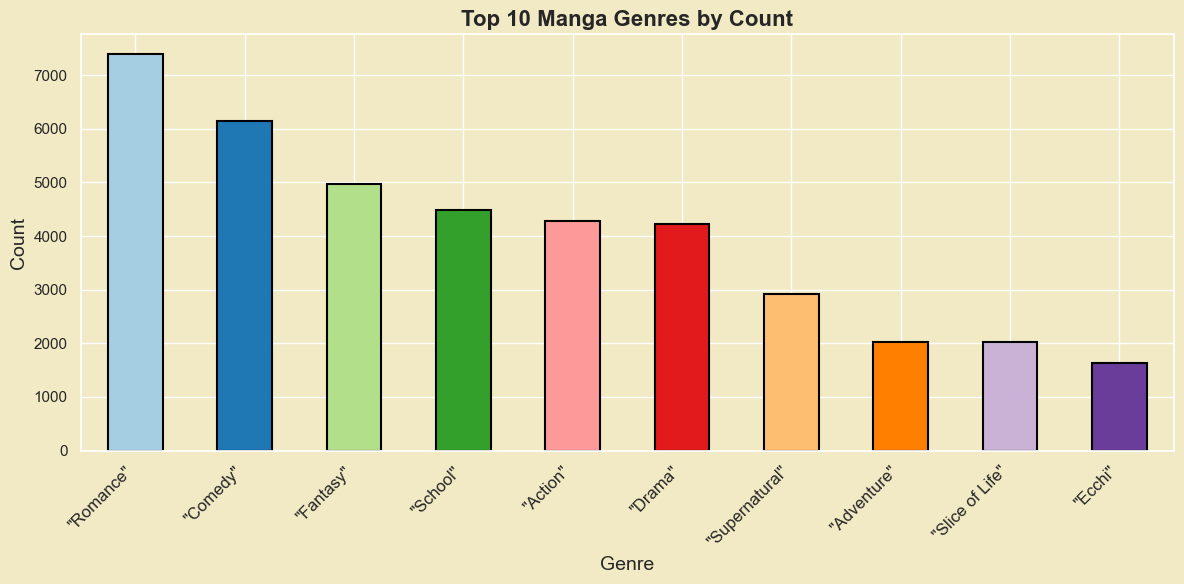

In [9]:
# Assuming manga_df is already loaded, proceed with your operations:
manga_data = manga_df.copy()

# Clean and process the 'Genres' column
manga_data['Genres'] = manga_data['Genres'].str.replace(r"[\[\]\']", '', regex=True)

# Split the genres into individual entries and flatten the list
genres_list = manga_data['Genres'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres_list.value_counts()

# Get the top 10 genres by count
top_10_genres = genre_counts.head(10)

# Plotting the bar chart for the top 10 genres with customized colors and borders
plt.figure(figsize=(12, 6))

# Define a color palette
colors = plt.cm.Paired.colors[:len(top_10_genres)]  # Use the 'Paired' color map, slicing to the number of top genres

# Create the bar plot with edges and colors
top_10_genres.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)

# Title and labels
plt.title('Top 10 Manga Genres by Count', fontsize=16, weight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust x-ticks to fit the genres
plt.xticks(rotation=45, ha='right', fontsize=12)

# Make the layout tight to prevent cut-off of labels
plt.tight_layout()

# Show the plot
plt.show()

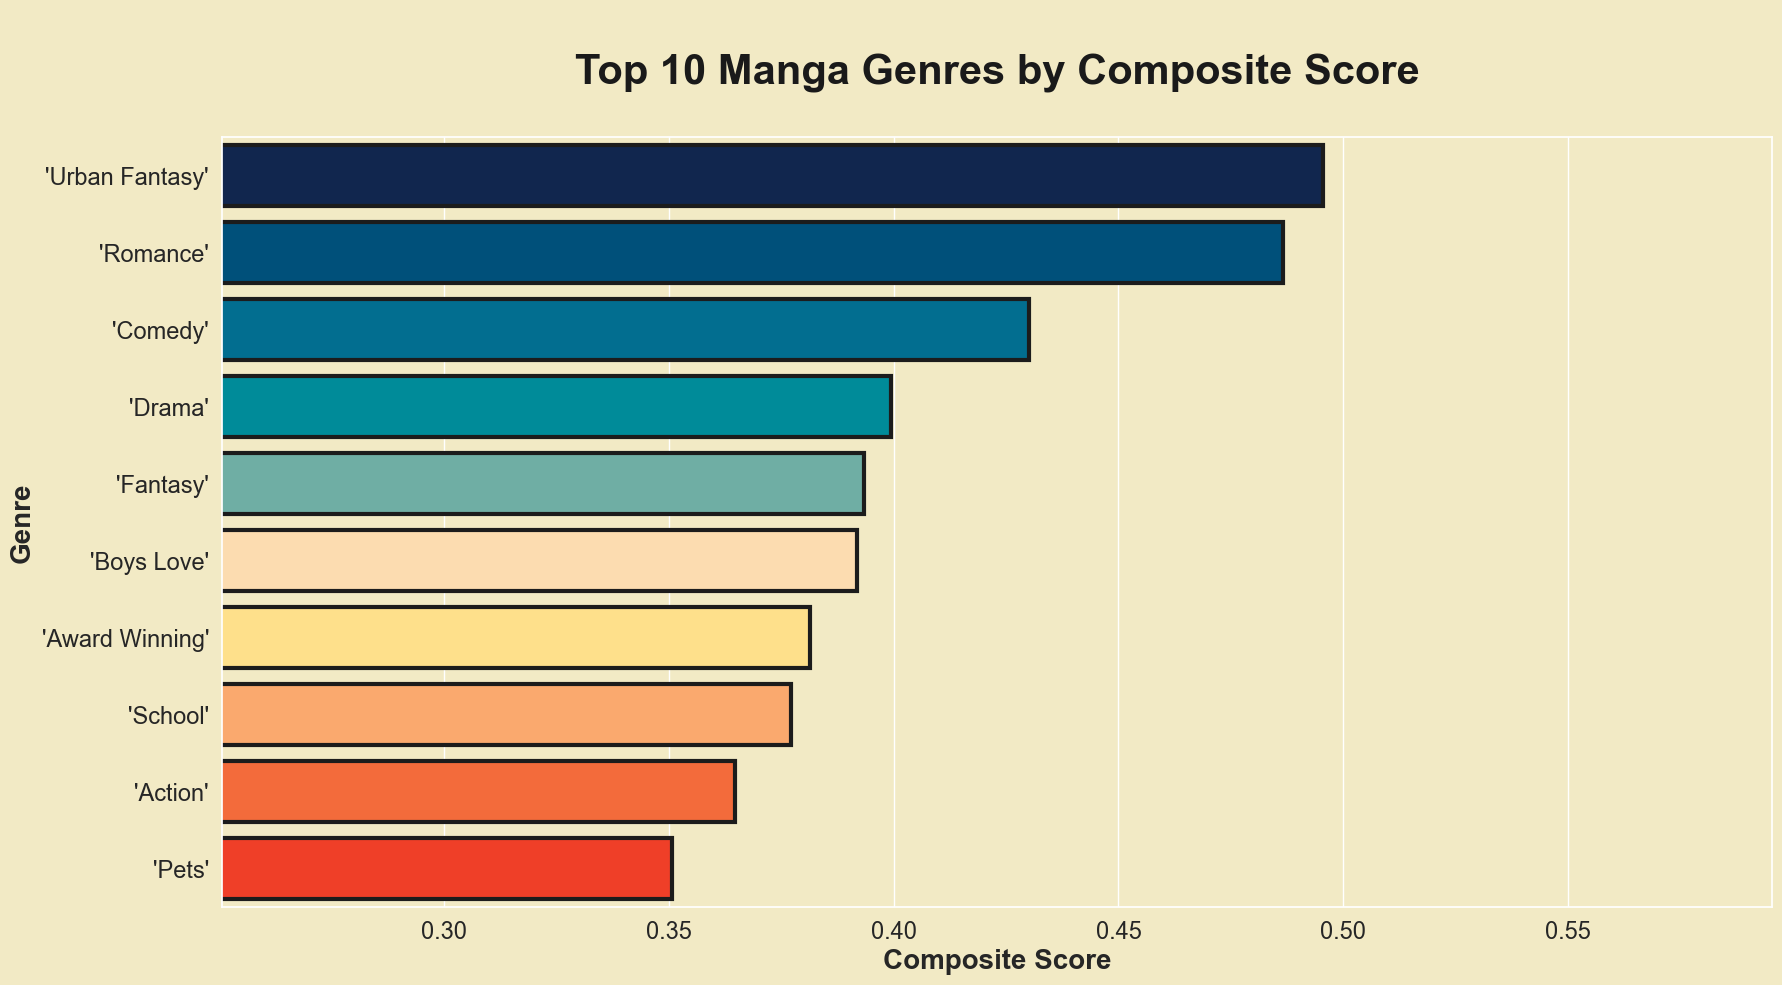

In [10]:
manga_copy_df = manga_df.copy()
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)

# Explode the dataset so each genre gets a separate row with the manga details
exploded_data_by_genre = manga_copy_df.explode('Genres')

# Grouping the data by genres and calculating the required metrics for each genre
genre_grouped = exploded_data_by_genre.groupby('Genres').agg({
    'Favorite': 'mean',  # Average favorite count
    'Score': 'mean',     # Average score
    'Title': 'count',    # Number of manga
    'Popularity': 'mean' # Average popularity
}).reset_index()

# Creating a composite score (simple average of the normalized scores of the four metrics)
scaler = MinMaxScaler()
genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']] = scaler.fit_transform(
    genre_grouped[['Favorite', 'Score', 'Title', 'Popularity']]
)

genre_grouped['Composite_Score'] = genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']].mean(axis=1)

sorted_by_composite_score = genre_grouped.sort_values(by='Composite_Score', ascending=False)

top_genres_by_composite_score = sorted_by_composite_score.head(10)

# Plotting the top genres by composite score
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.figure(figsize=(20,10))
p=sns.barplot(data=top_genres_by_composite_score,x='Composite_Score',y='Genres',palette=palette,saturation=1,edgecolor="#1c1c1c",linewidth=3)
plt.title('\nTop 10 Manga Genres by Composite Score\n',fontsize=30, color='k', weight='bold')
plt.xlabel('Composite Score',fontsize=20, weight='bold')
plt.ylabel('Genre',fontsize=20, weight='bold')

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.xlim(min(top_genres_by_composite_score['Composite_Score']) - 0.1, max(top_genres_by_composite_score['Composite_Score']) + 0.1)
plt.show()

### Biểu đồ 1: **Top 10 Manga Genres by Count**
- **Ý nghĩa**: Biểu đồ này sắp xếp 10 thể loại manga có số lượng manga nhiều nhất.  
- **Nhận xét**:
  - Thể loại **Romance** đứng đầu với hơn 7000 manga, cho thấy đây là thể loại rất phổ biến.
  - Các thể loại **Comedy**, **Fantasy**, và **School** cũng có số lượng manga đáng kể, lần lượt đứng ở các vị trí tiếp theo.
  - **Slice of Life** và **Ecchi** xếp cuối trong top 10 nhưng vẫn có số lượng manga đáng kể so với các thể loại khác.
  - Đây là một thước đo dựa trên tần suất xuất hiện nhưng chưa thể hiện chất lượng hoặc mức độ yêu thích.

### Biểu đồ 2: **Top 10 Manga Genres by Composite Score**
- **Ý nghĩa**: Biểu đồ này xếp hạng các thể loại dựa trên một composite score được tính toán từ nhiều yếu tố như số lượng yêu thích, điểm trung bình, số lượng manga, và mức độ phổ biến.  
- **Nhận xét**:
  - **Urban Fantasy** đứng đầu với composite score cao nhất, cho thấy thể loại này không chỉ phổ biến mà còn được yêu thích và có chất lượng cao.
  - Các thể loại **Romance** và **Comedy** xếp thứ hai và ba, chứng minh rằng ngoài số lượng lớn, chúng còn được đánh giá cao theo nhiều tiêu chí.
  - Một số thể loại ít phổ biến hơn như **Award Winning** hay **Pets** vẫn lọt vào top 10 nhờ có điểm số cao, chứng tỏ rằng chất lượng hoặc mức độ yêu thích của chúng vượt trội dù số lượng không nhiều.

### Tổng quan:
- **Sự khác biệt**: Biểu đồ 1 chỉ tập trung vào số lượng, trong khi biểu đồ 2 cung cấp cái nhìn toàn diện hơn bằng cách kết hợp nhiều tiêu chí.  
- **Ứng dụng**: Biểu đồ 1 hữu ích để hiểu sự phổ biến về mặt tần suất, còn biểu đồ 2 giúp xác định những thể loại xuất sắc toàn diện và đáng để khám phá hơn.  


**CÂU HỎI**  
Chiều dài của tiêu đề manga đã thay đổi như thế nào qua các năm?  
Những thể loại manga nào sẽ có tiêu đề dài?  

**MỤC ĐÍCH**  
Khám phá xu hướng thay đổi về tên gọi và tiêu đề của manga qua các năm.  
Hiểu rõ hơn về văn hóa đọc manga của độc giả.  
Xác định những thể loại manga nào thường có tiêu đề dài một cách bất thường.  

**Ý tưởng**  
Tạo cột **title_len** để tính chiều dài của tiêu đề và cột **Year** để lưu năm phát hành của manga.  
Lấy ra hai cột **Year** và **title_len** từ dữ liệu gốc và lưu vào một dataframe mới.  
Tính toán giá trị trung bình và giá trị tối đa của chiều dài tiêu đề theo từng năm và trực quan hóa chúng.

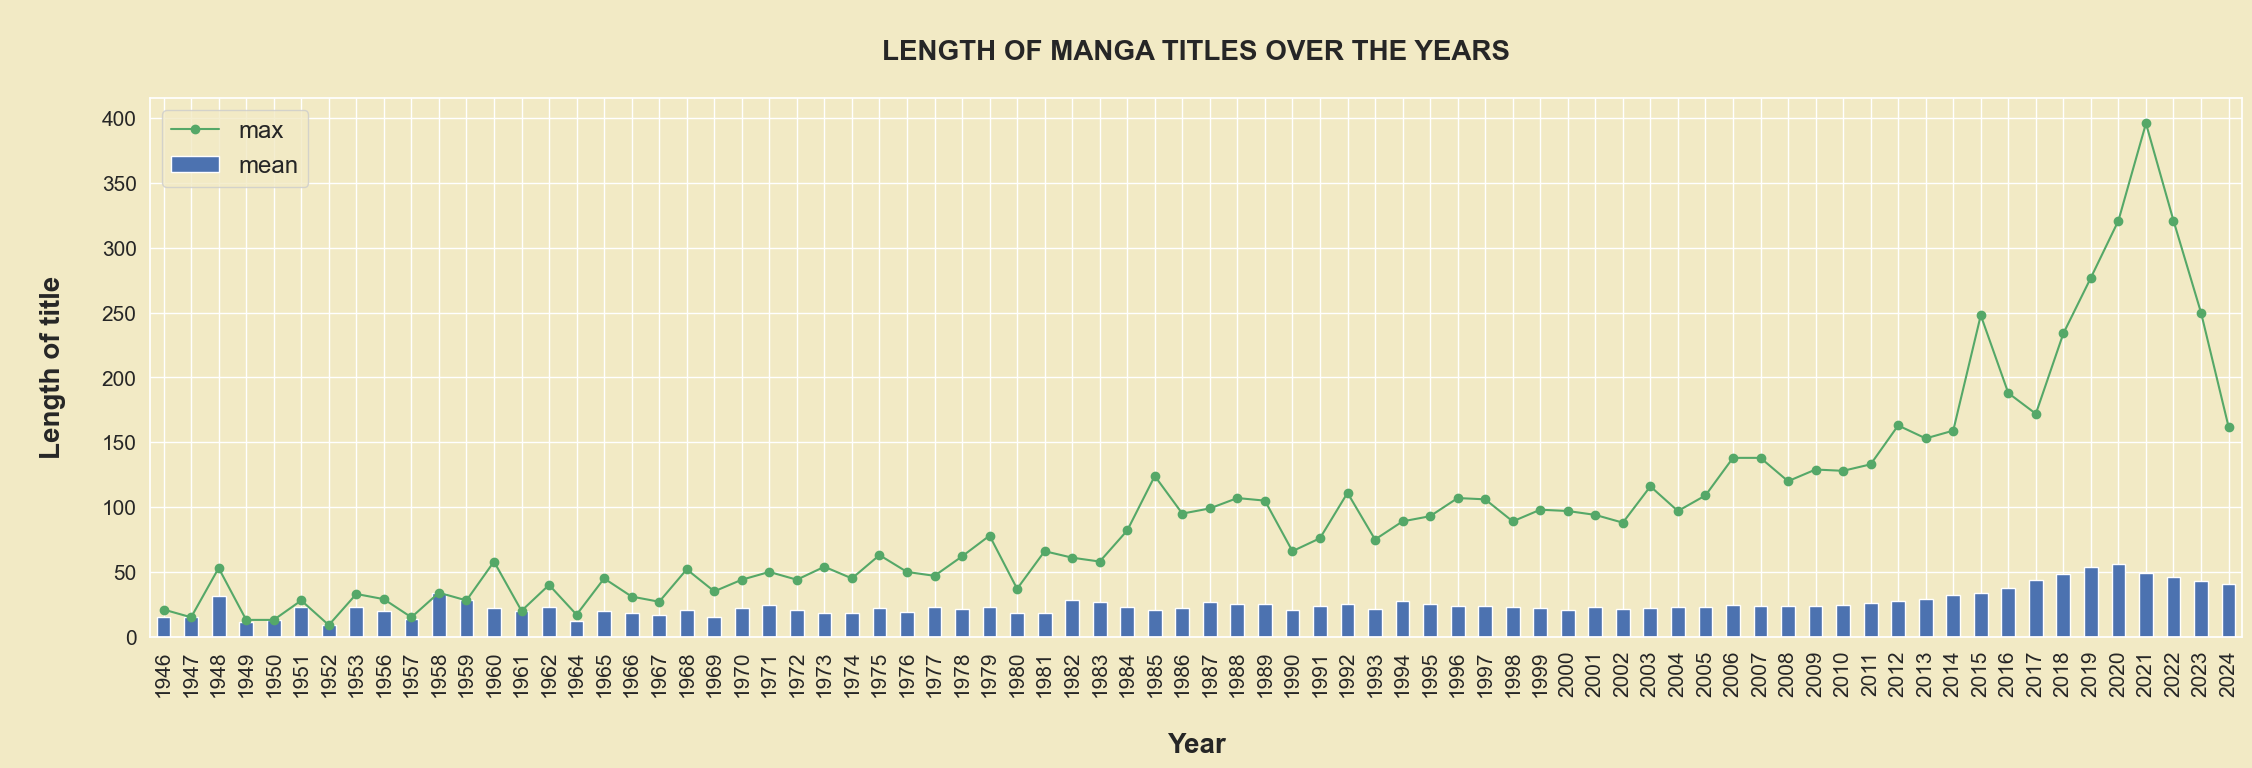

In [12]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
manga_copy_df = manga_df.copy()
new_col = manga_copy_df['Title'].str.len()
new_col.name = 'title_len'
manga_copy_df = pd.concat((manga_copy_df, new_col), axis=1)
manga_copy_df['Year'] = pd.to_datetime(manga_copy_df['Released date'], errors='coerce').dt.year

t = manga_copy_df[['title_len', 'Year']]
t2 = t.groupby('Year')['title_len'].agg(['mean', 'max']).reset_index()

ax = t2.plot(y='max', linestyle='-', marker='o', color='g')
t2.plot(x='Year', y='mean', kind='bar', ax=ax, figsize=(27,7), fontsize=15);
ax.legend(loc='upper left', fontsize='x-large');
ax.set_xlabel('\nYear', fontsize=20, weight='bold')
ax.set_ylabel('\nLength of title\n', fontsize=20, weight='bold');
ax.set_title('\nLENGTH OF MANGA TITLES OVER THE YEARS\n',fontsize=20, weight='bold');


**NHẬN XÉT:**

**Trung bình (Mean):**

Chiều dài trung bình của tiêu đề manga có xu hướng tăng lên theo thời gian.
Điều đặc biệt là từ năm 2015 đến 2021, các tiêu đề manga có chiều dài dài nhất trong những năm được xem xét. Có thể kết luận rằng trong giai đoạn này, xu hướng đặt tên manga thiên về các tên dài.
Tổng thể, chiều dài tiêu đề manga bắt đầu từ khoảng 10 ký tự và hiện tại đã tăng lên khoảng 50 ký tự.

**Tối đa (Max):**

Giới hạn cao nhất về độ dài tiêu đề đã tăng lên nhanh chóng theo thời gian. Bắt đầu từ năm 2005 đến nay, chúng ta thấy một sự gia tăng mạnh mẽ trong chiều dài tiêu đề manga.
Đỉnh cao của sự gia tăng này là vào các năm 2020, 2021 và 2022. Đây là ba cột mốc trong xu hướng đặt tên dài cho tiêu đề manga.
Tiêu đề manga dài nhất vào khoảng 400 ký tự vào năm 2021.
Sau năm 2021, chiều dài tiêu đề bắt đầu giảm mạnh, nhưng so với những năm đầu, chúng vẫn còn cao.

**Một số lý do tại sao nhiều manga có tiêu đề dài:**

1. **Giúp manga nổi bật**: Do sự cạnh tranh trong ngành, các tác giả phải tìm cách thu hút sự chú ý của độc giả. Một trong những cách phổ biến là đặt tiêu đề dài.
   - Mặc dù tiêu đề dài khó nhớ, nhưng nó không thực sự làm giảm sự quan tâm của độc giả. Thực tế, nếu bộ truyện trở nên phổ biến, độc giả chắc chắn sẽ tìm ra biệt danh dễ nhớ hơn.
   
2. **Truyền tải cốt truyện một cách dễ dàng**: Không phải ai cũng có thời gian hoặc hứng thú đọc các tóm tắt cốt truyện trên bìa của light novel hoặc manga. Do đó, tiêu đề dài trở thành một xu hướng giúp độc giả dễ dàng hiểu về nội dung câu chuyện và liệu nó có hợp với sở thích của họ hay không.

Điều quan trọng là tiêu đề dài cung cấp cho bạn cái nhìn tổng quát về bối cảnh câu chuyện ngay từ đầu, giúp bạn xác định liệu đó có phải là thứ bạn muốn dành thời gian đọc hay không. Đây là sự thật của xã hội ngày nay. Vì chúng ta bị choáng ngợp bởi nội dung từ mọi phía, chúng ta phải cẩn thận trong việc chọn lựa những gì đáng để bỏ thời gian đọc.

**CÂU HỎI**  
Mối quan hệ giữa thể loại mà các tác giả (Mangaka) viết và thể loại mà độc giả yêu thích là gì?  
Liệu những thể loại mà độc giả thích có phải cũng là những thể loại mà tác giả yêu thích không?  
Có sự khác biệt nào giữa sự lựa chọn của tác giả và độc giả đối với mỗi thể loại không?

**MỤC ĐÍCH**  
Khám phá mối liên hệ giữa thể loại được viết tốt và thể loại được yêu thích nhiều.  
Tìm hiểu liệu thể loại phổ biến nhất có phải là thể loại được viết nhiều nhất không.  
Hiểu rõ hơn liệu các tác giả sẽ viết dựa trên xu hướng hiện tại hay viết manga dựa trên thế mạnh của họ.  
Xác định sự khác biệt giữa sở thích đọc của tác giả và độc giả.

**PHÂN TÍCH**  
Tính tổng số tác giả viết về mỗi thể loại.  
Tính tổng số lượt yêu thích (Favorites) của manga thuộc mỗi thể loại.  
Trực quan hóa dữ liệu bằng biểu đồ cột kết hợp với biểu đồ đường. Biểu đồ cột thể hiện số lượng tác giả viết về thể loại đó, trong khi biểu đồ đường thể hiện số lượng yêu thích của độc giả đối với thể loại đó.